In [94]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [95]:
data = pd.read_csv('/home/muskan/personal/Datasets/student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 472.0 bytes


In [97]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0,0.5,'Scores')

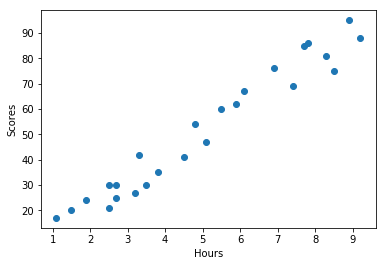

In [98]:
plt.scatter(data.Hours,data.Scores)
plt.xlabel('Hours')
plt.ylabel('Scores')

In [99]:
x = data.iloc[:,0]
y = data.iloc[:,1]

In [100]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0) 

In [101]:
lr = LinearRegression()
lr.fit(np.array(xtrain).reshape(-1,1), ytrain)
ypred = lr.predict(np.array(xtest).reshape(-1,1))
lr.score(np.array(xtest).reshape(-1,1),ytest)

0.9454906892105354

In [102]:
print lr.intercept_ , lr.coef_

2.018160041434662 [9.91065648]


In [103]:
df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [104]:
print mean_absolute_error(ytest,ypred)
print mean_squared_error(ytest,ypred)
print np.sqrt(mean_squared_error(ytest,ypred))

4.183859899002982
21.598769307217456
4.647447612100373


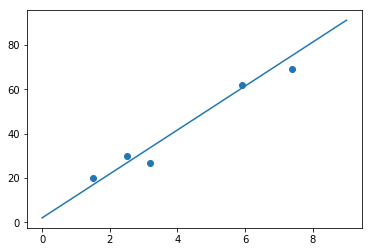

In [105]:
x1 = np.arange(max(data.Hours))
y1 = lr.intercept_ + x1*lr.coef_
plt.plot(x1,y1)
plt.scatter(xtest,ytest)